In [59]:
from typing import Dict, List

import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

# Case: Coin Toss

We will use the probability distribution of coin toss for our experiment.

Suppose we have 2 different coins. One coin is a “fair” coin, and the other is “unfair” coin. They have the probability distributions as follows:
- Fair coin: $P[X=1] = 0.5$ & $P[X=0] = 0.5$
- Unfair coin: $P[X=1] = α$ & $P[X=0] = 1-α$

For the rest of the notebook, we denote $p$ as probability distribution of fair coin and $q$ as probability distribution of unfair coin, unless stated otherwise.

# Metrics Comparison

We compare different probability distances:
1. abs distance: $\Sigma |p-q|$
2. ratio distance: $\Sigma p/q$
3. log ratio distance: $\Sigma \log(p/q)$
4. KL distance: $\Sigma p \log(p/q)$

In [80]:
def abs_distance(p: np.array, q: np.array) -> float:
    return np.sum(np.abs(p - q))

def ratio_distance(p: np.array, q: np.array) -> float:
    return np.sum(p / q)

def log_ratio_distance(p: np.array, q: np.array) -> float:
    return np.sum(np.log(p / q))

def kl_distance(p: np.array, q: np.array) -> float:
    return np.sum(p * np.log(p / q))

We calculate the metrics for different possibility of $\alpha$.

In [81]:
p: np.array = np.array([0.5, 0.5])
_compare: List[Dict[str, float]] = []
for i in np.arange(0.01, 1.0, 0.01):
    q: np.array = np.array([i, 1.0-i])
    _compare.append({
        "p": i,
        "abs_distance": abs_distance(p, q),
        "ratio_distance": ratio_distance(p, q),
        "log_ratio_distance": log_ratio_distance(p, q),
        "kl_distance": kl_distance(p, q),
    })
compare_df: pd.DataFrame = pd.DataFrame(_compare)
display(compare_df.head())

,p,abs_distance,ratio_distance,log_ratio_distance,kl_distance
0,0.01,0.98,50.505051,3.228926,1.614463
1,0.02,0.96,25.510204,2.545931,1.272966
2,0.03,0.94,17.182131,2.150723,1.075361
3,0.04,0.92,13.020833,1.873403,0.936702
4,0.05,0.90,10.526316,1.660731,0.830366


## Abs Distance

The results show that Absolute Distance increases linearly, whereas KL Divergence exhibits a parabolic-like behavior. Both of them are good metrics. However, in machine learning applications, KL Divergence is often preferred because it assigns a “much bigger” distance when the probability distributions are significantly different, making it more sensitive to large discrepancies.

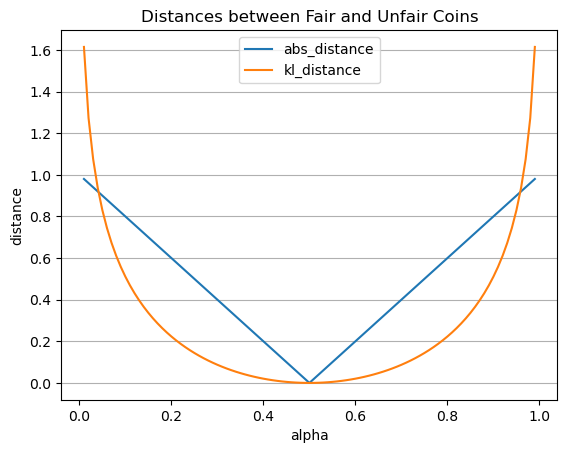

In [87]:
plt.plot(compare_df["p"], compare_df["abs_distance"], label="abs_distance")
plt.plot(compare_df["p"], compare_df["kl_distance"], label="kl_distance")

plt.title("Distances between Fair and Unfair Coins")
plt.xlabel("alpha")
plt.ylabel("distance")
plt.grid(axis="y")

plt.legend()
plt.show()

## Ratio Distance

Using ratio distance, it's not possible to get distance 0. Therefore, ratio distance is not a proper metric.

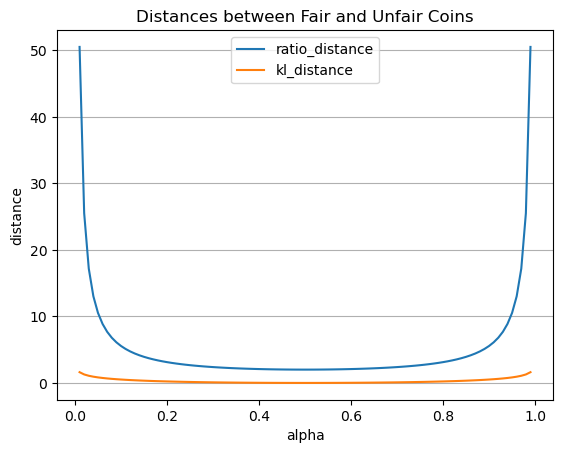

In [88]:
plt.plot(compare_df["p"], compare_df["ratio_distance"], label="ratio_distance")
plt.plot(compare_df["p"], compare_df["kl_distance"], label="kl_distance")

plt.title("Distances between Fair and Unfair Coins")
plt.xlabel("alpha")
plt.ylabel("distance")
plt.grid(axis="y")

plt.legend()
plt.show()

## Log Ratio Distance

In the plot below, there doesn't seem to be anything wrong with log ratio distance.

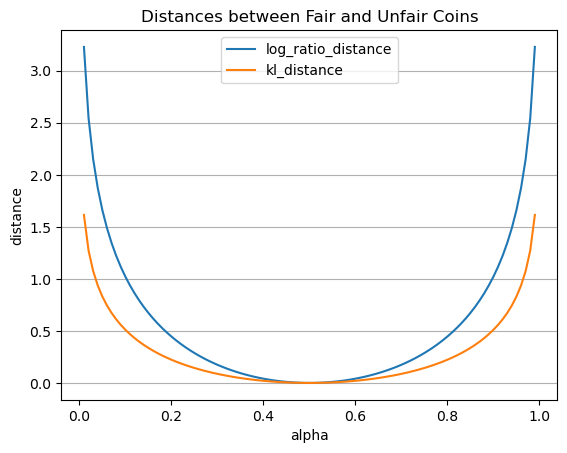

In [89]:
plt.plot(compare_df["p"], compare_df["log_ratio_distance"], label="log_ratio_distance")
plt.plot(compare_df["p"], compare_df["kl_distance"], label="kl_distance")

plt.title("Distances between Fair and Unfair Coins")
plt.xlabel("alpha")
plt.ylabel("distance")
plt.grid(axis="y")

plt.legend()
plt.show()

If we swap p & q, log ratio distance can produce negative values. Thus, log ratio distance is not a good metric.

In [78]:
p: np.array = np.array([0.5, 0.5])
_compare: List[Dict[str, float]] = []
for i in np.arange(0.01, 1.0, 0.01):
    q: np.array = np.array([i, 1.0-i])
    _compare.append({
        "p": i,
        "abs_distance": abs_distance(q, p),
        "ratio_distance": ratio_distance(q, p),
        "log_ratio_distance": log_ratio_distance(q, p),
        "kl_distance": kl_distance(q, p),
    })
compare_swapped_df: pd.DataFrame = pd.DataFrame(_compare)
display(compare_swapped_df.head())

,p,abs_distance,ratio_distance,log_ratio_distance,kl_distance
0,0.01,0.98,2.0,-3.228926,0.637146
1,0.02,0.96,2.0,-2.545931,0.595108
2,0.03,0.94,2.0,-2.150723,0.558405
3,0.04,0.92,2.0,-1.873403,0.525203
4,0.05,0.90,2.0,-1.660731,0.494632


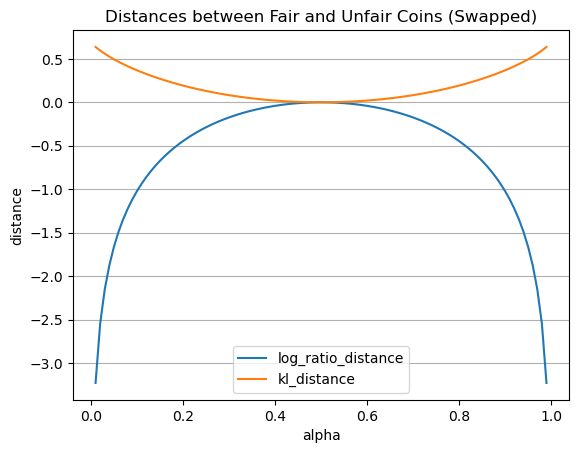

In [91]:
plt.plot(compare_swapped_df["p"], compare_swapped_df["log_ratio_distance"], label="log_ratio_distance")
plt.plot(compare_swapped_df["p"], compare_swapped_df["kl_distance"], label="kl_distance")

plt.title("Distances between Fair and Unfair Coins (Swapped)")
plt.xlabel("alpha")
plt.ylabel("distance")
plt.grid(axis="y")

plt.legend()
plt.show()